In [2]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\micha\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


Using legacy 'setup.py install' for sklearn, since package 'wheel' is not installed.
    Running setup.py install for sklearn: started
    Running setup.py install for sklearn: finished with status 'done'


In [3]:
from pandas_profiling import ProfileReport
from sklearn.impute import KNNImputer

In [2]:
import pandas_profiling
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv("C:/Users/micha/OneDrive/Documents/RGU/Project/Coding/meets.csv")

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8482 entries, 0 to 8481
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   MeetID       8482 non-null   int64 
 1   MeetPath     8482 non-null   object
 2   Federation   8482 non-null   object
 3   Date         8482 non-null   object
 4   MeetCountry  8482 non-null   object
 5   MeetState    5496 non-null   object
 6   MeetTown     6973 non-null   object
 7   MeetName     8482 non-null   object
dtypes: int64(1), object(7)
memory usage: 530.2+ KB


In [3]:
data_s = pd.read_csv("C:/Users/micha/OneDrive/Documents/RGU/Project/Coding/meets_edited.csv")

In [ ]:
profile = ProfileReport(data_s)
profile

In [8]:
data_s = data_s.convert_dtypes()

In [10]:
data_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8482 entries, 0 to 8481
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   MeetID       7364 non-null   Int64 
 1   MeetPath     8482 non-null   string
 2   Federation   8482 non-null   string
 3   Date         8482 non-null   string
 4   MeetCountry  8482 non-null   string
 5   MeetState    5496 non-null   string
 6   MeetTown     6973 non-null   string
 7   MeetName     8482 non-null   string
 8   RandomNums   6652 non-null   Int64 
dtypes: Int64(2), string(7)
memory usage: 613.1 KB


In [ ]:
missing_values = data["city"].isnull().sum()

Data Types

In [11]:
data_s["MeetPath"].apply(type)

0       <class 'str'>
1       <class 'str'>
2       <class 'str'>
3       <class 'str'>
4       <class 'str'>
            ...      
8477    <class 'str'>
8478    <class 'str'>
8479    <class 'str'>
8480    <class 'str'>
8481    <class 'str'>
Name: MeetPath, Length: 8482, dtype: object

In [19]:
check = list(data_s['day'].map(type).unique())
print('datatype is ' + str(check))
print(check.apply(type))

datatype is [<class 'int'>]


AttributeError: 'list' object has no attribute 'dtype'

In [20]:
data_s['day'].map(type)

0      <class 'int'>
1      <class 'int'>
2      <class 'int'>
3      <class 'int'>
4      <class 'int'>
           ...      
725    <class 'int'>
726    <class 'int'>
727    <class 'int'>
728    <class 'int'>
729    <class 'int'>
Name: day, Length: 730, dtype: object

In [ ]:
a = []

for element in list(data_s['day']):

    if isinstance(element, int):
        a.append('int')

a

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8482 entries, 0 to 8481
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   MeetID       8482 non-null   int64 
 1   MeetPath     8482 non-null   object
 2   Federation   8482 non-null   object
 3   Date         8482 non-null   object
 4   MeetCountry  8482 non-null   object
 5   MeetState    5496 non-null   object
 6   MeetTown     6973 non-null   object
 7   MeetName     8482 non-null   object
dtypes: int64(1), object(7)
memory usage: 530.2+ KB


In [10]:
data.isna().sum()

MeetID            0
MeetPath          0
Federation        0
Date              0
MeetCountry       0
MeetState      2986
MeetTown       1509
MeetName          0
dtype: int64

In [11]:
from sklearn.preprocessing import OneHotEncoder

In [62]:
data_n = data
cat = data_n.select_dtypes(include=['object'])

col_names = list(cat.columns)
col_encoded = dict()

for col in col_names:
    cat_dummies = pd.get_dummies(data_n[col])
    col_encoded[str(col)] = cat_dummies


C:\Users\micha\AppData\Local\Temp\ipykernel_18168\24179067.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  col_encoded_df.append(col_encoded, ignore_index=True)


,MeetPath,Federation,Date,MeetCountry,MeetState,MeetTown,MeetName
0,365strong/1601 365strong/1602 365stron...,365Strong AAPF AAU ADFPA APA APC A...,1974-03-02 1974-03-30 1974-04-27 1974...,Argentina Australia Belarus Brazil C...,AB ACT AK AKL AL AR AZ BC BOP C...,Aas Abbotsford Aberdeen Abernathy Ab...,015 Pennsylvania State Bench Press and D...


In [68]:
col_decoded = dict()
for col in col_names:
    cat_rev = pd.get_dummies(data_n[col]).idxmax(1)
    col_decoded[str(col)] = cat_rev


In [ ]:
col_decoded['MeetPath']

In [ ]:
col_decoded

In [26]:
cat_rev = pd.get_dummies(cat_one).idxmax(1)
cat_rev.head()

0    2016 Junior & Senior National Powerlifting Cha...
1                    Thanksgiving Powerlifting Classic
2                               Charlotte Europa Games
3                     Carolina Cup Push Pull Challenge
4                                Eastern USA Challenge
dtype: object

In [ ]:
#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding on 'team' column 
encoder_df = pd.DataFrame(encoder.fit_transform(df[['team']]).toarray())

#merge one-hot encoded columns back with original DataFrame
final_df = df.join(encoder_df)

Anomaly Detection With PyCaret

In [ ]:
pip install pycaret --user

In [3]:
pip install pyod

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: scipy>=1.3.1 in c:\users\micha\appdata\roaming\python\python38\site-packages (from pyod) (1.5.4)



In [3]:
pip install numpy==1.21 --user

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [11]:
#from pycaret.datasets import get_data
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

In [2]:
from pycaret.anomaly import *

In [1]:
pip install pyod

  Using cached pyod-0.9.8.tar.gz (114 kB)
  Created wheel for pyod: filename=pyod-0.9.8-py3-none-any.whl size=136773 sha256=2e6e82d4084c668ee36f4575a11fbf8f5864a234b302738fd2f41bd79e7e2a50
  Stored in directory: c:\users\micha\appdata\local\pip\cache\wheels\7a\14\69\4b53db0c3ffca9c2acfb88d5dfcd3638fbf9cc780e0226712b
Successfully built pyod
Note: you may need to restart the kernel to use updated packages.


In [3]:
data = pd.read_csv('ride4U.csv')
data_num = data.select_dtypes(include=['int64', 'float64']).dropna()

In [4]:
setup = setup(data_num, session_id = 123)

,Description,Value
0,session_id,123
1,Original Data,"(726, 4)"
2,Missing Values,False
3,Numeric Features,4
4,Categorical Features,0
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(726, 4)"
9,CPU Jobs,-1


In [9]:
iforest = create_model('iforest')
print(iforest)

IForest(behaviour='new', bootstrap=False, contamination=0.05,
    max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=-1,
    random_state=123, verbose=0)


In [6]:
iforest_results = assign_model(iforest)
iforest_results.head()

,day,temperature,humidity,uses,Anomaly,Anomaly_Score
0,9,16.65,38.76,5438.0,0,-0.087377
1,7,7.40,45.23,1803.0,0,-0.033465
2,13,29.99,45.63,8849.0,0,-0.040887
3,9,6.43,46.90,1924.0,0,-0.032024
4,20,9.71,47.52,3786.0,0,-0.086861


In [7]:
iforest_anomaly=iforest_results[iforest_results['Anomaly']==1]
iforest_anomaly.shape

(37, 6)

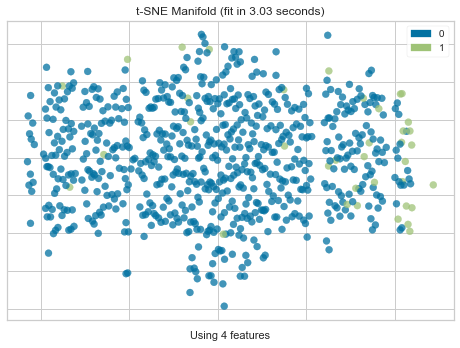

<AxesSubplot:title={'center':'t-SNE Manifold (fit in 3.03 seconds)'}, xlabel='Using 4 features'>

In [8]:
from yellowbrick.features import Manifold
dfr = iforest_results['Anomaly']
viz = Manifold(manifold="tsne")
viz.fit_transform(data_num, dfr)
viz.show()

In [ ]:
plot_model(iforest)

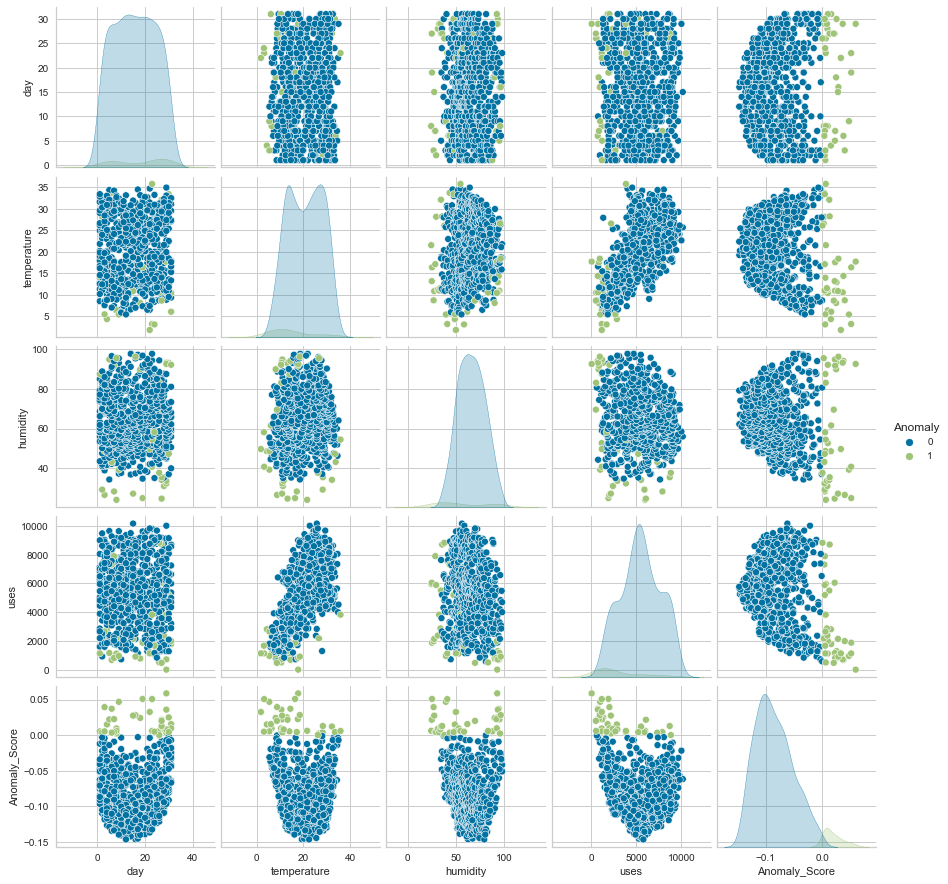

In [10]:
sns.pairplot(iforest_results, hue='Anomaly')

In [17]:
px.scatter_matrix(
    data_frame=iforest_results,
    dimensions = list(data_num.columns),
    color="Anomaly",
    title="Scatter matrix for TOEFL Score, GRE Score, and CGPA conditioning on Research variable",
)

Clustering

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score



In [61]:
scaler = StandardScaler()
df = scaler.fit_transform(data_num)


clus_range = [2,3,4,5,6,7,8,9,10]
inertias = []

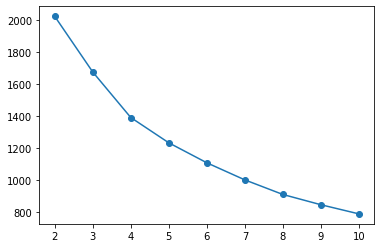

In [62]:
for c in clus_range:
    kmeans = KMeans(init="k-means++", n_clusters=c, n_init=100, random_state=0).fit(df)
    inertias.append(kmeans.inertia_)

plt.figure()
plt.plot(clus_range,inertias, marker ='o')

In [52]:
kmeans_sel = KMeans(init="k-means++", n_clusters=3, n_init=100, random_state=123).fit(df)
labels = pd.DataFrame(kmeans_sel.labels_)
clust_df = data_num.assign(Cluster=labels)

In [56]:
fte_colors = {0: "#008fd5",
     1: "#fc4f30"}


km_colors = [fte_colors[label] for label in kmeans.labels_]
plt.scatter(df[:, 0], df[:, 1], c=km_colors)

KeyError: 8

In [55]:
scatters(clust_df, h='Cluster')

NameError: name 'scatters' is not defined